## Arle Fabian Rodriguez Urrea

In [70]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from IPython.display import Image as PImage

#### Se importa dataset train.csv

In [49]:
DTA = pd.read_csv("train.csv")

#### Numero de filas y columnas que contiene el dataset

In [51]:
DTA.shape

(1460, 81)

#### Tipos de datos del dataset

In [52]:
DTA.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

#### Descripción de numero de datos faltantes para cada vaiable

In [53]:
NANColumns=[]
i=-1
for a in DTA.isnull().sum():
    i+=1
    if a!=0:
        print(DTA.columns[i],a)
        NANColumns.append(DTA.columns[i])

LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


In [5]:
DTAU = DTA.loc[:,["TotRmsAbvGrd","GarageArea", "GarageCars","OverallCond","PoolArea","OverallQual","LotArea", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "TotRmsAbvGrd", "Fireplaces", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "SalePrice"]]

#### Limpieza de datos

In [6]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
DTAU_F = clean_dataset(DTAU)

In [7]:
DTAU_F.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### Creación de variable binaria
#### Se crea una varaiable binaria basada en la variable SalePrice, donde si el valor es mayor a 214000.000000 equivale a 1 y si el valor es menor equivale a 0

In [8]:
DTAU_F["SalePriceBinary"] = np.where(DTAU_F['SalePrice']>214000.000000 , 1, 0)
DTAU_F.SalePriceBinary.describe()

count    1460.000000
mean        0.247945
std         0.431968
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SalePriceBinary, dtype: float64

### Matriz de correlacion
##### La Matriz de correlacion evidencia que la correlacion la mayoría de los parametros tienden a tener una correlación positiva con SalePriceBinary

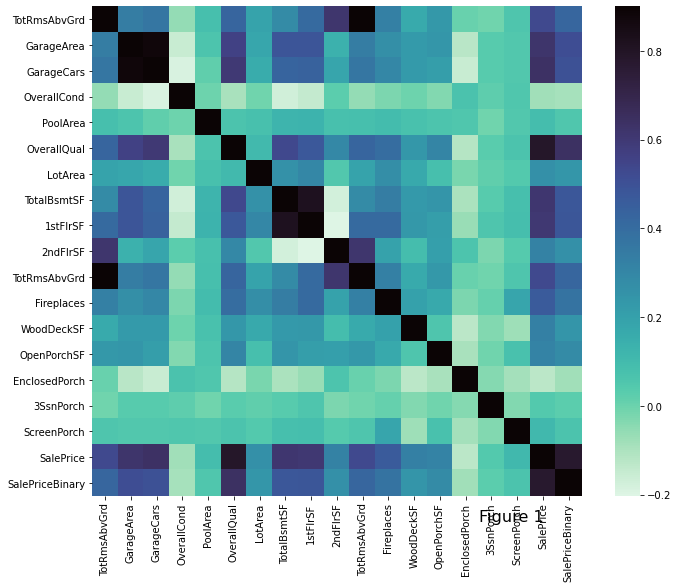

In [59]:
k=1
corrmat = DTAU_F.corr()
f, ax = plt.subplots(figsize=(12, 9))
heatm = sns.heatmap(corrmat, vmax=0.9, square=True, cmap = 'mako_r');
heatm.text(15, 20, 'Figure {}'.format(k),fontsize=16)
k=k+1

# Variables con mayor correlacion respecto a la variable TotalBsmtSF
#### Se puede notar que las variables que tienes mayor correlacion con la variable SalePriceBinary son SalePrice y OverallQual con 0.779 y 0.644 respectivamente

<AxesSubplot:>

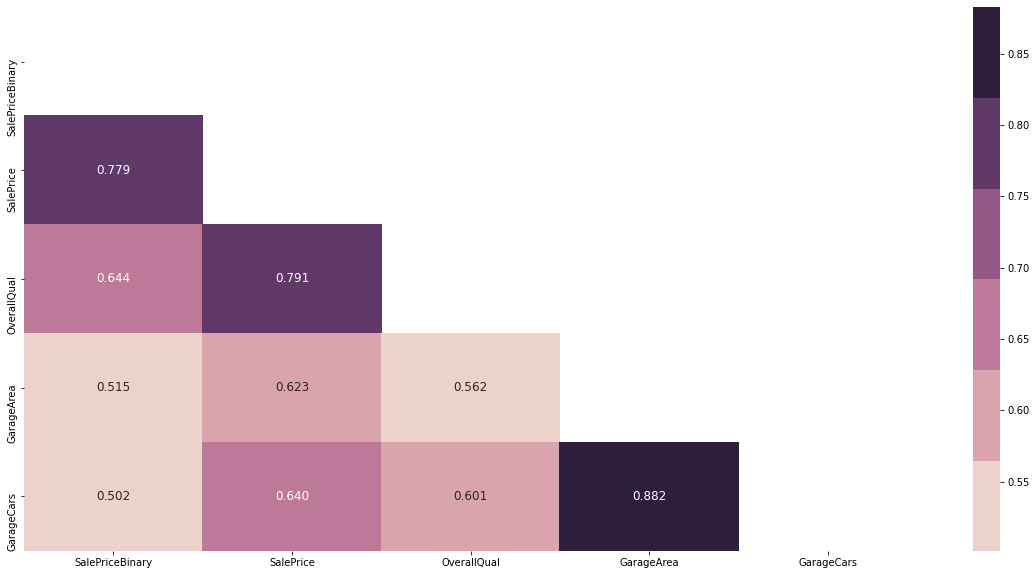

In [57]:
corr_feat = DTAU_F.corr().nlargest(5,"SalePriceBinary")["SalePriceBinary"].index
cmap = np.corrcoef(DTAU_F[corr_feat].values.T)
mask = np.zeros_like(cmap,dtype=bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,10))
sns.heatmap(cmap,
            annot=True,
            fmt=".3f",
            annot_kws = {"size":12},
            cmap=sns.cubehelix_palette(),
            xticklabels = corr_feat.values,
            yticklabels = corr_feat.values,
            mask=mask)

In [63]:
from scipy.stats import norm

### Se geenera una grafica de distribución para la variable SalePriceBinary
#### Se evidencia que la variable SalePriceBinary es positivamente simetrica

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 1.168608
Kurtosis: -0.635227


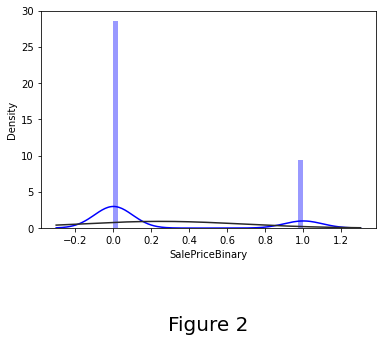

In [64]:
sns.distplot(DTAU_F['SalePriceBinary'], color= 'blue', fit=norm);
plt.title('Figure {}'.format(k), y=-0.5, fontsize = 20)
print("Skewness: %f" % DTAU_F['SalePriceBinary'].skew())
print("Kurtosis: %f" % DTAU_F['SalePriceBinary'].kurt())

### En los siguientes graficos se puede analizar
#### Se puede ver que la variable SalePriceBinary al ser una variable binaria muestra una tendencia plana en 1 y 0, debido a que estos valores no cambian.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


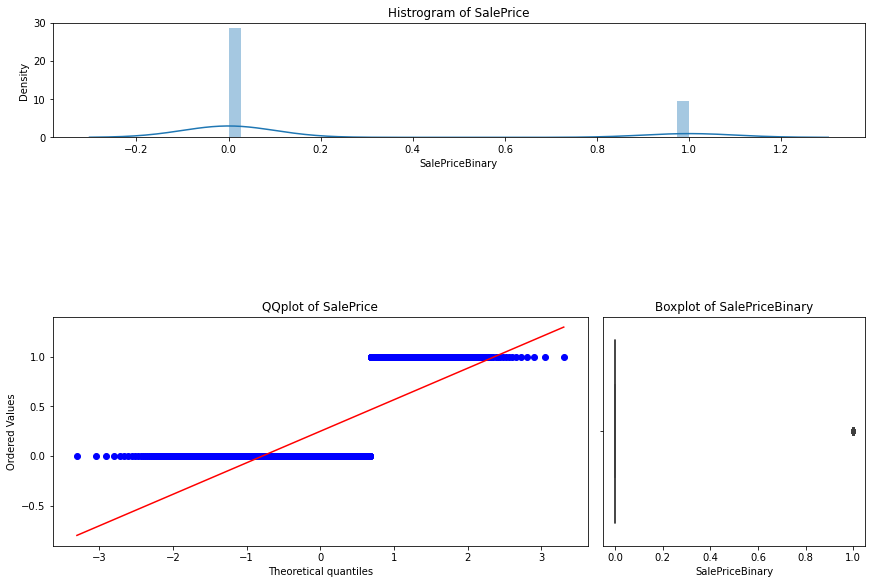

In [71]:
fig = plt.figure(constrained_layout=True, figsize=(12,8))
grid = gridspec.GridSpec(ncols=3, nrows=4, figure=fig)

ax1 = fig.add_subplot(grid[0,:])
sns.distplot(DTAU_F["SalePriceBinary"],ax=ax1)
ax1.set_title("Histrogram of SalePrice")

ax2 = fig.add_subplot(grid[2:,:2])
stats.probplot(DTAU_F["SalePriceBinary"],plot=ax2)
ax2.set_title("QQplot of SalePrice")

ax3 = fig.add_subplot(grid[2:,2])
sns.boxplot(DTAU_F["SalePriceBinary"],ax=ax3,orient="v")
ax3.set_title("Boxplot of SalePriceBinary")
plt.show()

#### Modelo Supervisado

In [26]:
y_train = DTAU_F['SalePriceBinary'].astype("int")
x_train = DTAU_F.loc[:,["TotRmsAbvGrd","GarageArea", "GarageCars","OverallCond","PoolArea","OverallQual","LotArea", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "TotRmsAbvGrd", "Fireplaces", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch"]]

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
import seaborn as sb
import matplotlib.pyplot as plt
from IPython.display import Image as PImage
from sklearn.linear_model import LinearRegression

In [28]:
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=20,
                                            min_samples_leaf=5,
                                            max_depth = 2,
                                            class_weight="balanced")
tree = decision_tree.fit(x_train, y_train)

In [29]:
confusion_matrix(y_train, tree.predict(x_train))

array([[876, 222],
       [ 36, 326]], dtype=int64)

### Metricas de la Matriz de confusion

##### Accuracy 

In [13]:
(876+326)/(876+36+326+222)

0.8232876712328767

##### Especificidad

In [14]:
(876)/(876+222)

0.7978142076502732

##### Sensitividad

In [15]:
(326)/(326+36)

0.9005524861878453

##### Valor predicitivo positivo ( Recall)

In [16]:
(326)/(326+222)

0.5948905109489051

##### Valor predicitivo Negativo ( Presicion)

In [17]:
876/(876+36)

0.9605263157894737

##### Curva ROC

In [30]:
probas = tree.predict_proba(x_train)

In [31]:
from sklearn.metrics import roc_curve, auc

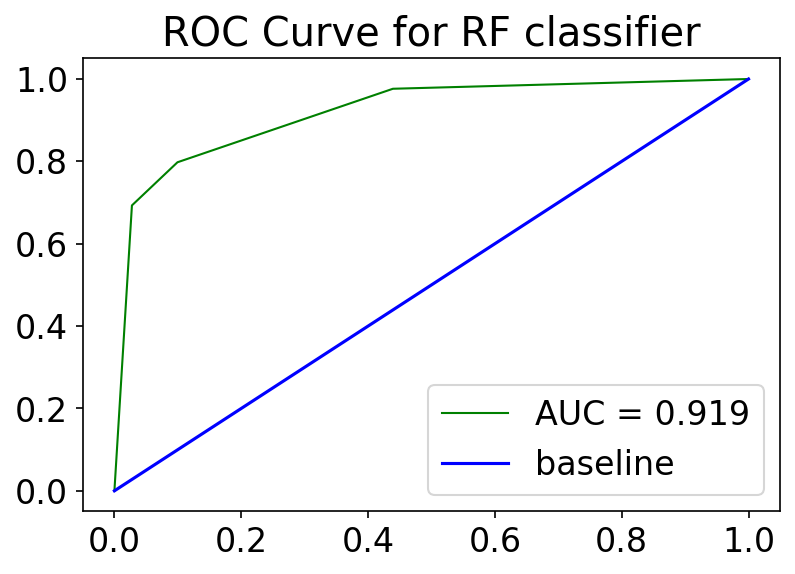

In [32]:
# get false and true positive rates
fpr, tpr, thresholds = roc_curve(y_train, probas[:,0], pos_label=0)
base_fpr, base_tpr, _ = roc_curve(y_train, [1 for _ in range(len(y_train))])
# get area under the curve
roc_auc = auc(fpr, tpr)
# PLOT ROC curve
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.title('ROC Curve for RF classifier')
plt.rcParams['font.size'] = 16
    # Plot both curves
plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
plt.legend();

#### Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
y_train = DTAU_F['SalePriceBinary'].astype("int")
x_train = DTAU_F.loc[:,["TotRmsAbvGrd","GarageArea", "GarageCars","OverallCond","PoolArea","OverallQual","LotArea", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "TotRmsAbvGrd", "Fireplaces", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch"]]

In [37]:
Random_F = RandomForestClassifier(n_estimators = 100,max_depth=1, random_state=0)
Random_Fit = Random_F.fit(x_train, y_train)

In [38]:
confusion_matrix(y_train, Random_Fit.predict(x_train))

array([[1093,    5],
       [ 213,  149]], dtype=int64)

### Importancia de las variables en elñ modelo

#### En la grafica se evidencia que las cuatro variables mas importantes para el modelo diseñado son; en su orden OverallQual, GarageCars, TotalBsmtSF y GarageArea.

Feature: 0, Score: 0.06000
Feature: 1, Score: 0.05000
Feature: 2, Score: 0.12000
Feature: 3, Score: 0.16000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.21000
Feature: 7, Score: 0.02000
Feature: 8, Score: 0.13000
Feature: 9, Score: 0.07000
Feature: 10, Score: 0.07000
Feature: 11, Score: 0.01000
Feature: 12, Score: 0.02000
Feature: 13, Score: 0.04000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.04000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000


<BarContainer object of 19 artists>

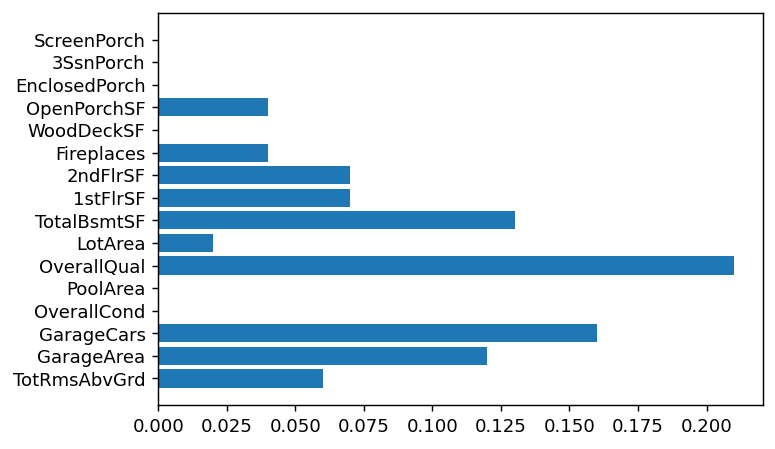

In [47]:
# get importance
from matplotlib import pyplot
importance = Random_Fit.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(dpi=130)
plt.rcParams['font.size'] = 10
plt.barh(x_train.columns, Random_Fit.feature_importances_)

### Conclusiones

#### La grafica muestra con la linea AUC que el modelo diseñado es muy confiable ya que llega a 0.919, lo que significa que la variable binaria que se creó (SalePriceBinary) para comparar con las demas variables del modelo, es bien entendida en su parte positiva y neagativa par el grafico de Curva ROC.

#### Con respecto a las variables Recall y presicion se puede ver que el modelo diseñado tiene un performance muy bueno con respecto a la predicción en la parte negativa, y un performance aceptable con respecto a la parte positiva. Esto se representa muy bien en la grafica de Curva ROC.